In [101]:
import numpy as np
import matplotlib.pyplot as plt

## q2

In [102]:
n=501
x2 = (n-1)/2
x1 = -x2
x1,x2

(-250.0, 250.0)

In [103]:
a=np.arange(x1,x2,1)
b=a

In [104]:
[x,y] = np.meshgrid(a,b)
x,y

(array([[-250., -249., -248., ...,  247.,  248.,  249.],
        [-250., -249., -248., ...,  247.,  248.,  249.],
        [-250., -249., -248., ...,  247.,  248.,  249.],
        ...,
        [-250., -249., -248., ...,  247.,  248.,  249.],
        [-250., -249., -248., ...,  247.,  248.,  249.],
        [-250., -249., -248., ...,  247.,  248.,  249.]]),
 array([[-250., -250., -250., ..., -250., -250., -250.],
        [-249., -249., -249., ..., -249., -249., -249.],
        [-248., -248., -248., ..., -248., -248., -248.],
        ...,
        [ 247.,  247.,  247., ...,  247.,  247.,  247.],
        [ 248.,  248.,  248., ...,  248.,  248.,  248.],
        [ 249.,  249.,  249., ...,  249.,  249.,  249.]]))

In [105]:
r= np.hypot(x,y)
km = 0.7*np.pi
rm=x2
w=rm/10
term1 = np.sin((km*r**2)/(2*rm))
term2 = 0.5*np.tanh((rm-r)/w) + 0.5
g= term1*term2
I = (g+1)/2

In [106]:
I=I*255


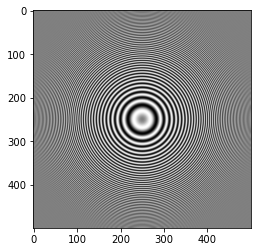

In [107]:
plt.imshow(I, cmap='gray')

In [108]:
I.shape

(500, 500)

In [109]:
centre = np.array(I.shape)//2
centre

array([250, 250])

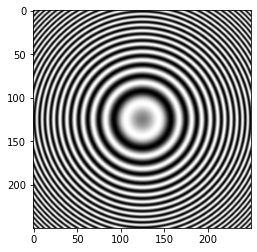

In [110]:
I_cropped = I[centre[0]-125:centre[0]+125, centre[1]-125:centre[1]+125]
plt.imshow(I_cropped, cmap='gray')

In [111]:
I_cropped.shape

(250, 250)

In [131]:
kernel = (1/70)*np.ones((5,5))
kernel

array([[0.01428571, 0.01428571, 0.01428571, 0.01428571, 0.01428571],
       [0.01428571, 0.01428571, 0.01428571, 0.01428571, 0.01428571],
       [0.01428571, 0.01428571, 0.01428571, 0.01428571, 0.01428571],
       [0.01428571, 0.01428571, 0.01428571, 0.01428571, 0.01428571],
       [0.01428571, 0.01428571, 0.01428571, 0.01428571, 0.01428571]])

In [132]:
from scipy import ndimage

In [133]:
smoothed = ndimage.convolve(I_cropped, kernel)
dst = cv.filter2D(I_cropped,-1,kernel)

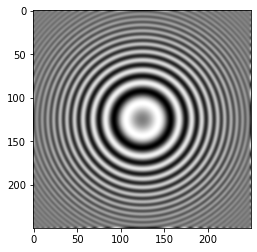

In [134]:
plt.imshow(smoothed, cmap='gray')

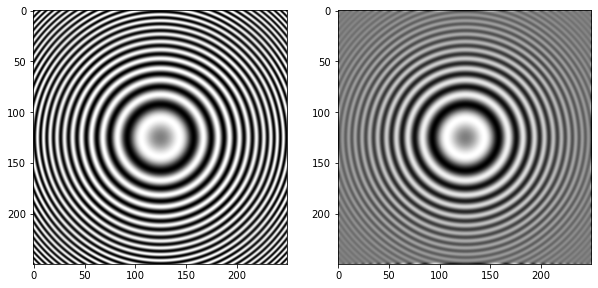

In [135]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(I_cropped, cmap='gray', label='original')
ax2.imshow(smoothed, cmap='gray',label='low pass smoothened')
plt.show()

In [136]:
import cv2 as cv

In [153]:
sobelxy = cv.Sobel(smoothed,cv.CV_64F,1,1,ksize=5)


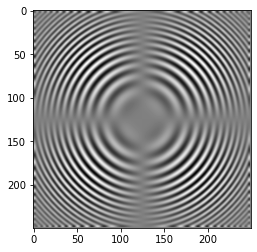

In [154]:
plt.imshow(sobelxy,cmap='gray')

In [155]:
low_sigma = cv.GaussianBlur(I_cropped,(3,3),0)
high_sigma = cv.GaussianBlur(I_cropped,(5,5),0)

# Calculate the DoG by subtracting
dog = low_sigma - high_sigma

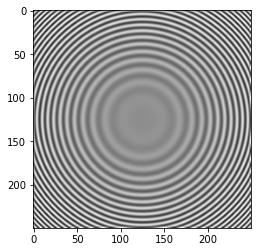

In [156]:
plt.imshow(dog, cmap='gray')

In [159]:
sobelxy

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.13162821e-14, -1.36494747e+02, -1.18960695e+02, ...,
        -3.31041964e+01, -2.16269391e+00, -2.84217094e-14],
       [-7.10542736e-15, -1.18960695e+02, -9.71606984e+01, ...,
        -6.19970881e+01, -3.21942974e+01,  7.10542736e-15],
       ...,
       [ 2.13162821e-14, -3.31041964e+01, -6.19970881e+01, ...,
         1.60507769e+02,  1.53597826e+02,  3.55271368e-14],
       [ 7.10542736e-15, -2.16269391e+00, -3.21942974e+01, ...,
         1.53597826e+02,  1.40908352e+02,  3.55271368e-14],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

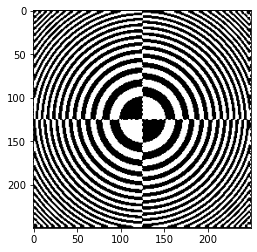

In [165]:
ret2,th2 = cv.threshold(sobelxy,0,255,cv.THRESH_BINARY)
plt.imshow(th2, cmap='gray')

In [184]:
ddepth=cv.CV_64F

In [186]:
edges = cv.Canny(th2,100,200)
plt.imshow(edges)

error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/canny.cpp:829: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'Canny'


## q3

In [180]:
a= np.array([1,1,-5])
b= np.array([4,-5,7])
acrossb = np.cross(a,b)
print("in homogeneous: ",acrossb)

in homogeneous:  [-18 -27  -9]


In [187]:
euclid = acrossb/[acrossb[2]]
print("in euclidean", euclid[:-1])

in euclidean [2. 3.]


## q4

In [168]:
R = np.array([[0.9,0.4,0.1732],[-0.4183,0.9043,0.0854],[-0.1225,-0.1493,0.9812]])

In [169]:
c = np.array([-1,-2,-3]).T

In [177]:
extrinsix = np.array([[0.9,0.4,0.1732,-1],[-0.4183,0.9043,0.0854,-2],[-0.1225,-0.1493,0.9812,-3],[0,0,0,1]])
extrinsix

array([[ 0.9   ,  0.4   ,  0.1732, -1.    ],
       [-0.4183,  0.9043,  0.0854, -2.    ],
       [-0.1225, -0.1493,  0.9812, -3.    ],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])